In [5]:
# import some pyhton packages that we are going to use in the analysis
import pandas as pd 
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go
from scipy import signal
from numpy import genfromtxt
from datetime import datetime
import glob
import os

HEART RATE ANALYSES

In [6]:
directory_path = "HR"
session_counter = 1

# use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join(directory_path, "*.csv"))

# intilaize a dataframe to be used for storing all hr signals from all sleep sessions (cumulative)
all_sessions_hr_signal = pd.DataFrame(columns=['session_id', 'hr', 'timestamp'])

# loop over the list of csv files
for file in csv_files:
     # intilaize a dataframe to be used for storing hr signal from one sleep session (temporary)
    session_hr_signal = pd.DataFrame(columns=['session_id', 'hr', 'timestamp'])
    # read the .csv file in a numpy array
    file_data = genfromtxt(file, delimiter=',')
    # use the first entry in the numpy array to identify the timestamp of the session
    session_start_timestamp = datetime.utcfromtimestamp(int(file_data[0])).strftime('%d-%m-%Y %H:%M:%S')
     # remove the timestamp at the first index and the sampling rate at the second index from the numpy array
    file_data = np.delete(file_data, [0, 1])
    # create a list with the timestamps for all hr values
    times = pd.date_range(session_start_timestamp, periods=len(file_data), freq='1S')
    # create a list with session id
    session_id = ['session_'+ str(session_counter)] * len(file_data)
    
    # put the data in the temporary dataframe
    session_hr_signal ['session_id'] = session_id
    session_hr_signal ['hr'] = file_data
    session_hr_signal ['timestamp'] = times

     # concatenate the cumulative dataframe with the temporary dataframe
    frames = [all_sessions_hr_signal, session_hr_signal]
    all_sessions_hr_signal = pd.concat(frames)



    session_counter = session_counter + 1


# set the time as index of the dataframe
all_sessions_hr_signal.set_index('timestamp', inplace=True)



In [7]:
minHeartRate = all_sessions_hr_signal['hr'].min()
maxHeartRate = all_sessions_hr_signal['hr'].max()
meanHeartRate = all_sessions_hr_signal['hr'].mean()
print(f"minimum heart rate is {minHeartRate} and maximum heart rate is {maxHeartRate}. The average is {meanHeartRate}")

minimum heart rate is 50.0 and maximum heart rate is 212.3. The average is 76.14943054000219


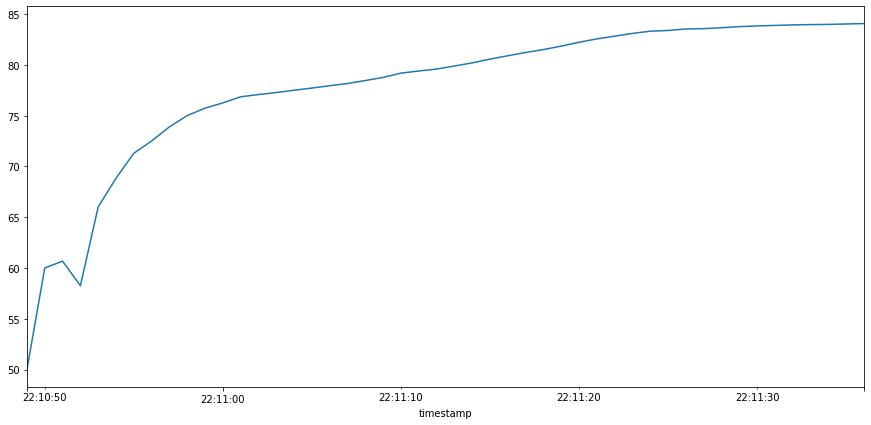

In [8]:
one_session_hr_signal = all_sessions_hr_signal[all_sessions_hr_signal.session_id.isin(['session_1'])]
fig, ax = plt.subplots(figsize=(15,7))
one_session_hr_signal['hr'].plot(ax=ax)

In [9]:
# Trace to visualize
trace = go.Scatter(
    x=one_session_hr_signal.index,
    y=one_session_hr_signal['hr'],
    name ='hr'
)


# Layout, in this case a Slider
layout = dict(
    title= 'HR',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1h',
                     step='hour',
                     stepmode='backward'),
                dict(count=6,
                     label='6h',
                     step='hour',
                     stepmode='backward'),
                dict(step='all')
                
            ]
            )
        ),
        rangeslider=dict(),
        type='date',
        title='Time'
    ),
        yaxis=dict(
            title='bpm',
    )
)

# Include in data all the traces you want to visualize
data = [trace]

fig = dict(data=data, layout=layout)
indexes = []


offline.iplot(fig
              , filename = 'hr')

In [10]:
# Trace to visualize
trace = go.Scatter(
    x=one_session_hr_signal.index,
    y=one_session_hr_signal['hr'],
    name ='hr'
)


# Layout, in this case a Slider
layout = dict(
    title= 'HR',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1h',
                     step='hour',
                     stepmode='backward'),
                dict(count=6,
                     label='6h',
                     step='hour',
                     stepmode='backward'),
                dict(step='all')
                
            ]
            )
        ),
        rangeslider=dict(),
        type='date',
        title='Time'
    ),
        yaxis=dict(
            title='bpm',
    )
)

# Include in data all the traces you want to visualize
data = [trace]

fig = dict(data=data, layout=layout)
indexes = []


offline.iplot(fig
              , filename = 'hr')

EDA ANALYSES

In [11]:
directory_path = "EDA"
session_counter = 1

# use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join(directory_path, "*.csv"))

# intilaize a dataframe to be used for storing all hr signals from all sleep sessions (cumulative)
all_sessions_eda_signal = pd.DataFrame(columns=['session_id', 'eda', 'timestamp'])

# loop over the list of csv files
for file in csv_files:
     # intilaize a dataframe to be used for storing hr signal from one sleep session (temporary)
    session_eda_signal = pd.DataFrame(columns=['session_id', 'eda', 'timestamp'])
    # read the .csv file in a numpy array
    file_data = genfromtxt(file, delimiter=',')
     # remove the timestamp at the first index and the sampling rate at the second index from the numpy array
    file_data = np.delete(file_data, [0, 1])
    # create a list with the timestamps for all hr values
    times = pd.date_range(session_start_timestamp, periods=len(file_data), freq='1S')
    # create a list with session id
    session_id = ['session_'+ str(session_counter)] * len(file_data)
    
    # put the data in the temporary dataframe
    session_eda_signal ['session_id'] = session_id
    session_eda_signal ['eda'] = file_data
    session_eda_signal ['timestamp'] = times

     # concatenate the cumulative dataframe with the temporary dataframe
    frames = [all_sessions_eda_signal, session_eda_signal]
    all_sessions_eda_signal = pd.concat(frames)



    session_counter = session_counter + 1


# set the time as index of the dataframe
#all_sessions_hr_signal.set_index('timestamp', inplace=True)



In [12]:
minEda = all_sessions_eda_signal['eda'].min()
maxEda = all_sessions_eda_signal['eda'].max()
meanEda = all_sessions_eda_signal['eda'].mean()
print(f"minimum electrodermal activity is {minEda} and maximum electrodermal activity is {maxEda}. The average is {meanEda}")

minimum electrodermal activity is 0.0 and maximum electrodermal activity is 6.090848. The average is 0.15822487925405934


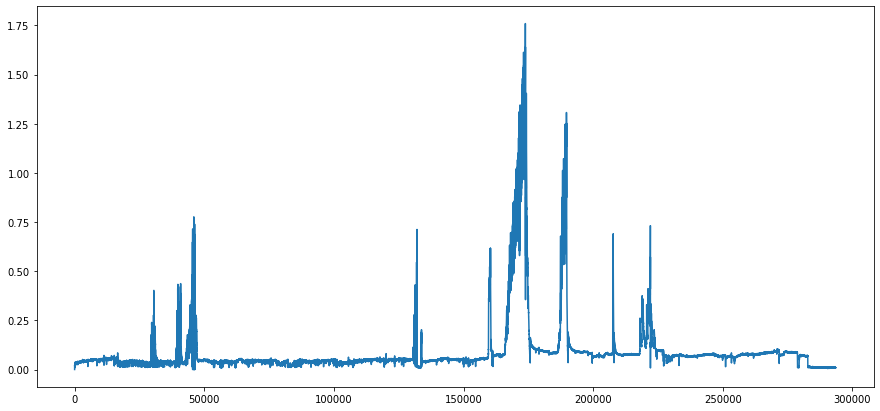

In [13]:
one_session_eda_signal = all_sessions_eda_signal[all_sessions_eda_signal.session_id.isin(['session_1'])]
fig, ax = plt.subplots(figsize=(15,7))
one_session_eda_signal['eda'].plot(ax=ax)

In [19]:
#merging the heart rate dataset and eda

pd.merge(one_session_eda_signal, one_session_hr_signal, on='session_id', how='outer').head()
#one_session_eda_signal.merge(one_session_hr_signal, on='session_id').head()

,session_id,eda,timestamp,hr
0,session_1,0.0,2022-11-24 05:38:35,50.00
1,session_1,0.0,2022-11-24 05:38:35,60.00
2,session_1,0.0,2022-11-24 05:38:35,60.67
3,session_1,0.0,2022-11-24 05:38:35,58.25
4,session_1,0.0,2022-11-24 05:38:35,66.00
